In [1]:
# Classification
    # Accuracy - TP + TN / All Data
    # Precision - TP / TP + FP - how many of identified +ves were actually +ve
    # Recall/ Sensitivity - TP / TP + FN - % of actual positives identified
    # F1-score - 2*Precision * Recall / Precision + Recall ... Harmonic mean of the two measures
        # https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
    # ROC/ AUC - for balanced classes. Precision/Recall for imbalanced classes.
# Regression
    # MAE / MSE / RMSE
# SciKit Learn - uniform interface across models
    # Every model exposed as an 'estimator' object; parameters can be adjusted at instantiation
    # fit / predict / predict_proba / score / transform 
# Reference:
    # https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

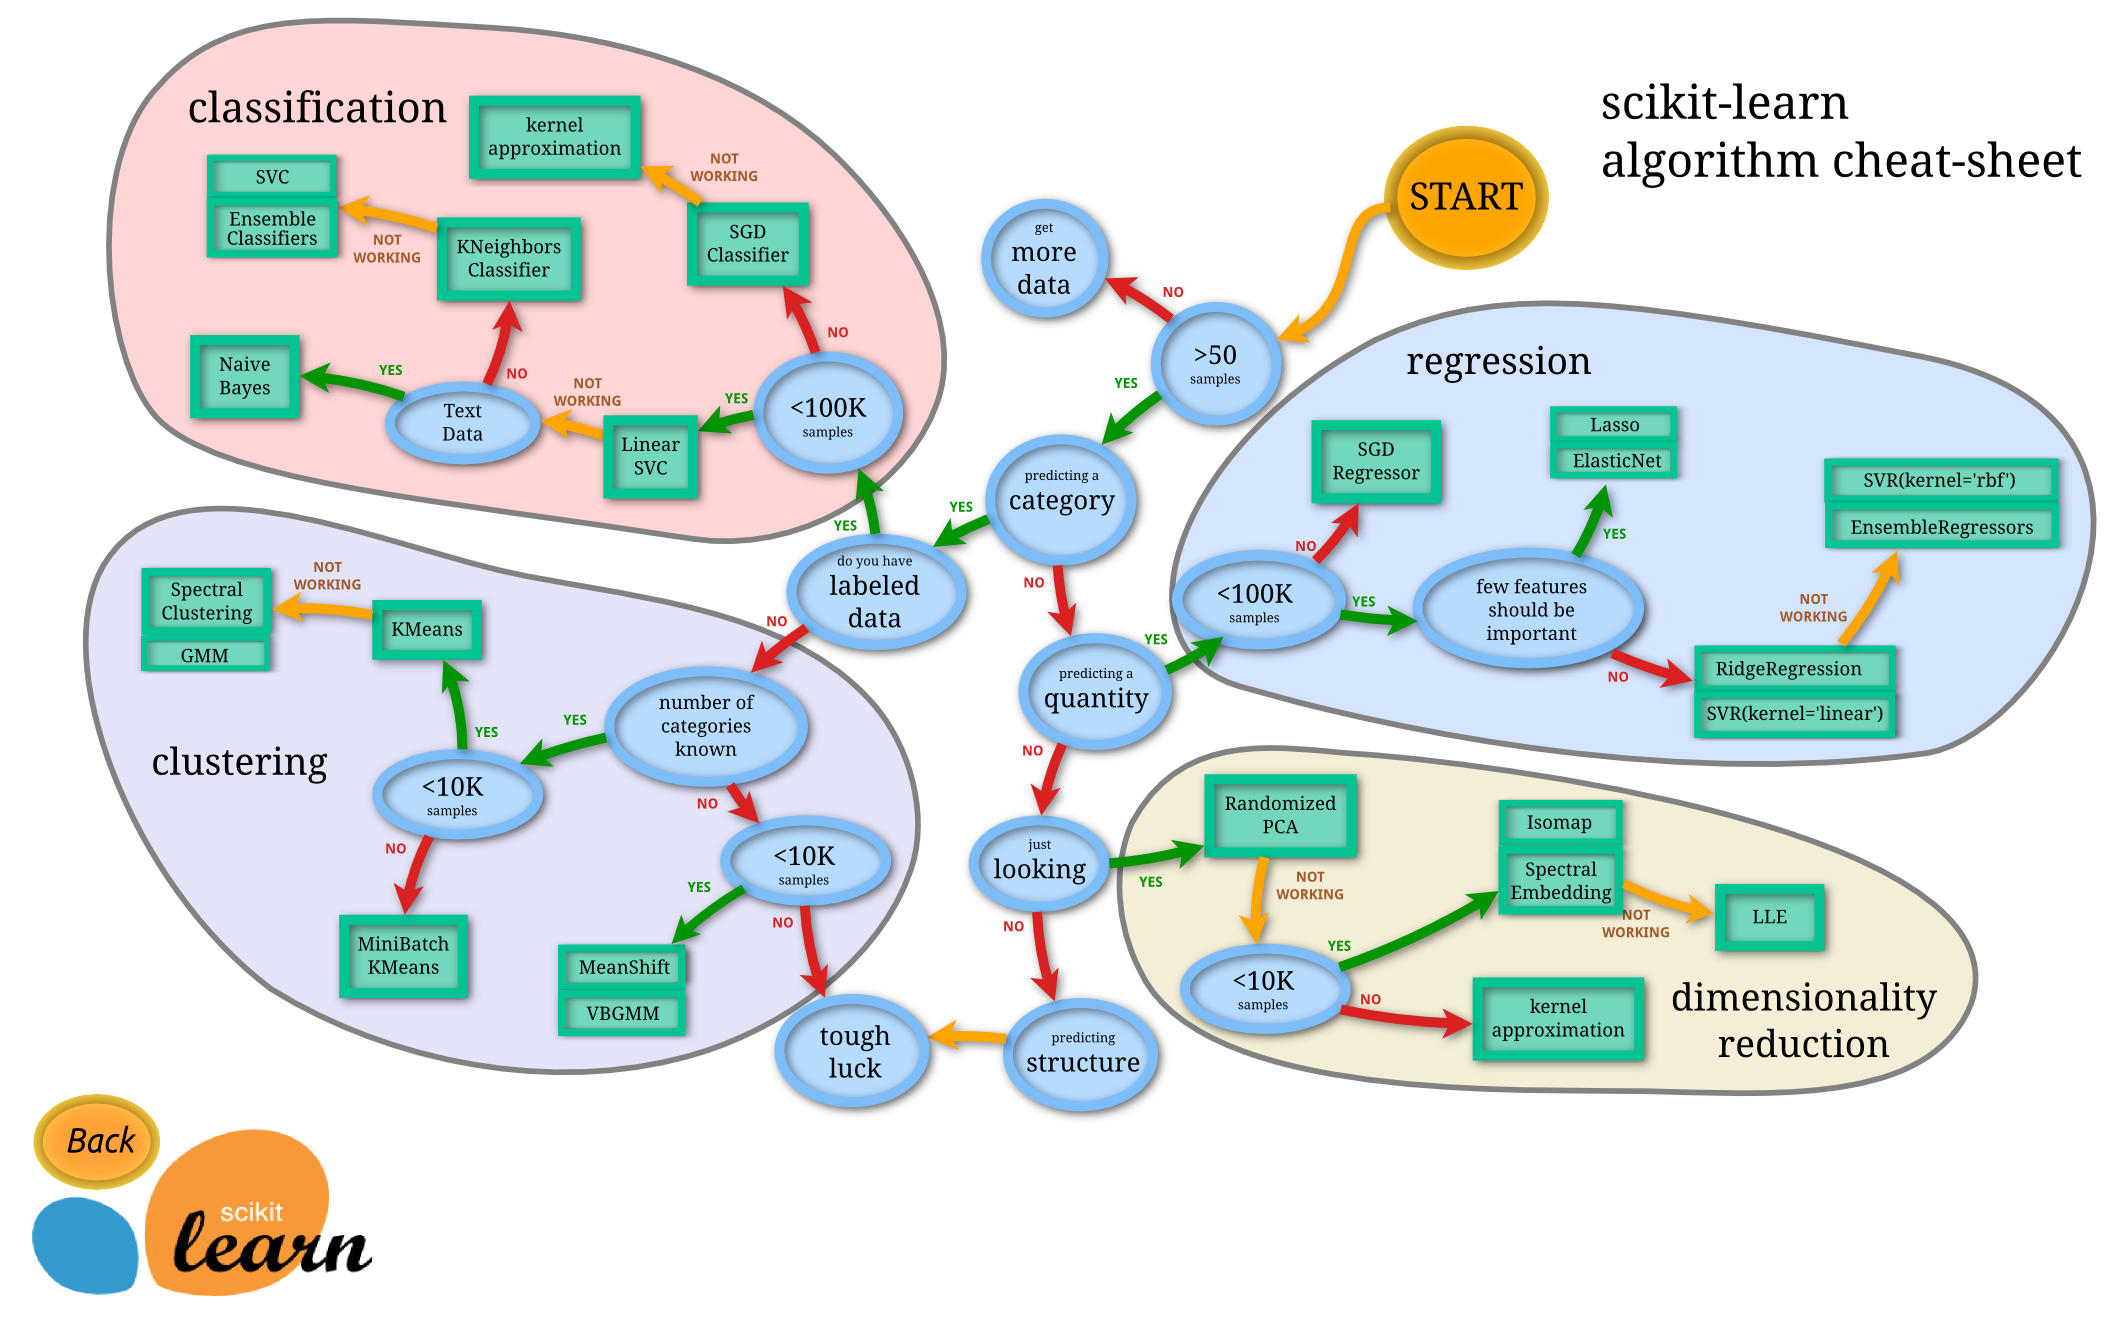

In [2]:
from IPython.display import Image
Image(filename='Sklearn_cs.png') 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## A. Linear Regression

### A.1 - Boston Home Prices

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
display(type(boston))
boston.keys()

sklearn.utils.Bunch

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X = pd.DataFrame(boston['data'], columns =boston['feature_names'])
Y = pd.DataFrame(data = boston['target'], columns=['Price'])
df = pd.concat([X,Y], axis=1)

print(Y.shape, X.shape)
print(Y.head())
print(X.head())

(506, 1) (506, 13)
   Price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
# sns.pairplot(pd.concat([Y,X], axis=1))

<AxesSubplot:>

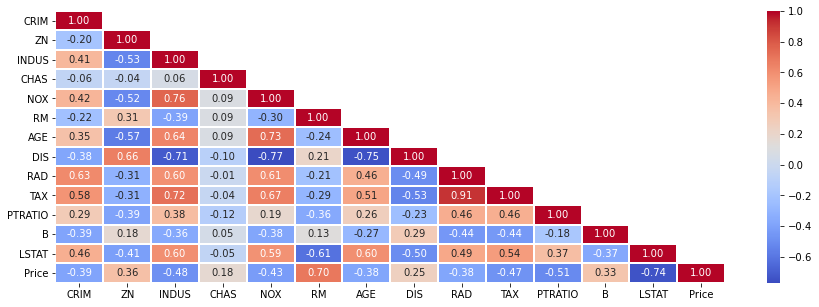

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), cmap='coolwarm', lw=1, annot=True, mask=np.triu(np.ones([14,14]),k=1), fmt='.2f')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
display(Y_train.shape, X_train.shape)

lm = LinearRegression()
lm.fit(X_train, Y_train)

(303, 1)

(303, 13)

LinearRegression()

In [11]:
print('Intercept = {:.2f}'.format(lm.intercept_[0]))
coeff = pd.DataFrame(data=lm.coef_.reshape(-1,1), index=X.columns, columns=['Coefficients'])
display(coeff)

Intercept = 41.28


,Coefficients
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


In [12]:
display(X_test.shape)
X_test.head()

(203, 13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32


In [13]:
Y_pred = lm.predict(X_test)
Y_pred.shape

(203, 1)

[Text(0.5, 0, 'Predicted Price'), Text(0, 0.5, 'Actual Price')]

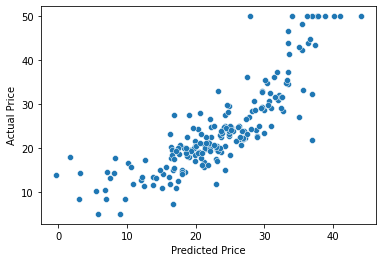

In [14]:
sns.scatterplot(x=Y_pred.reshape(-1), y=Y_test['Price']).set(xlabel='Predicted Price', ylabel='Actual Price')

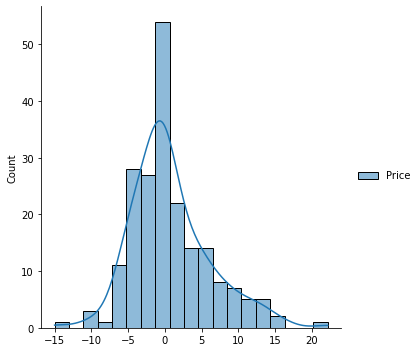

In [15]:
sns.displot(Y_test-Y_pred, kde=True, label='Error')

In [16]:
print('MAE  = {:.2f}'.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('MSE  = {:.2f}'.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('RMSE = {:.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

MAE  = 3.91
MSE  = 29.42
RMSE = 5.42


### A.2 - Ecommerce Data

In [17]:
df = pd.read_csv('data_Ecommerce Customers')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
df.sample(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642
370,aaron04@yahoo.com,"16338 Scott Corner Suite 727\nWest Alexandra, ...",SeaGreen,33.705113,10.163179,37.763041,4.778974,521.240780
298,bradleysmith@barber.com,"581 Gilmore Port\nHeatherville, MS 20879",PaleVioletRed,33.622592,11.167357,35.626587,5.462501,587.574799
187,kcannon@alvarez-cline.info,55479 Peters Field Apt. 702\nNorth Micheleberg...,Lavender,32.543459,13.332839,37.964390,3.597460,537.215053
183,jlawson@mccarthy.com,"0127 Morgan Fields Apt. 080\nThompsonfurt, ME ...",LightGray,33.122400,11.509048,37.253058,3.182330,452.122625


In [20]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


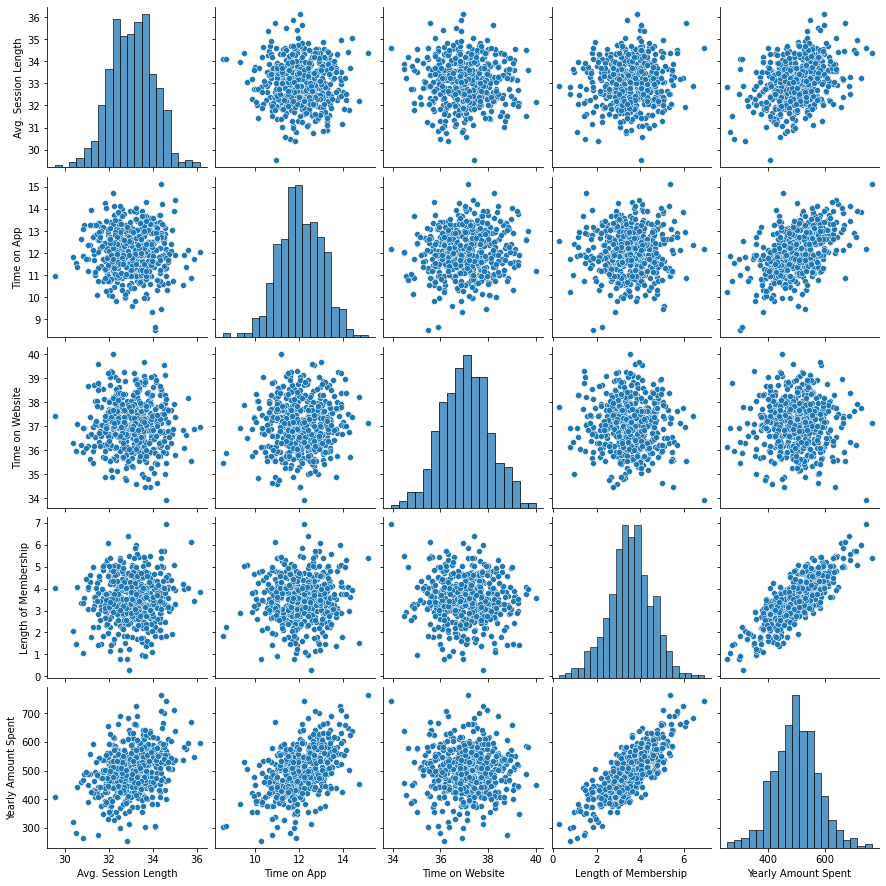

In [21]:
sns.pairplot(df)

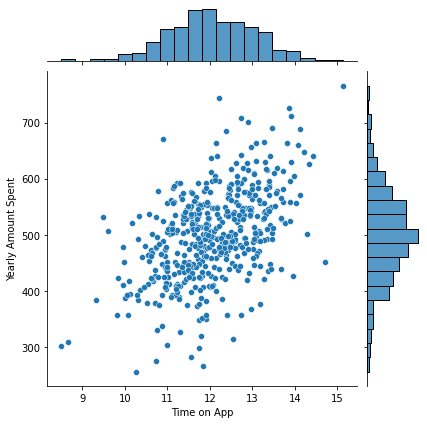

In [22]:
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent')

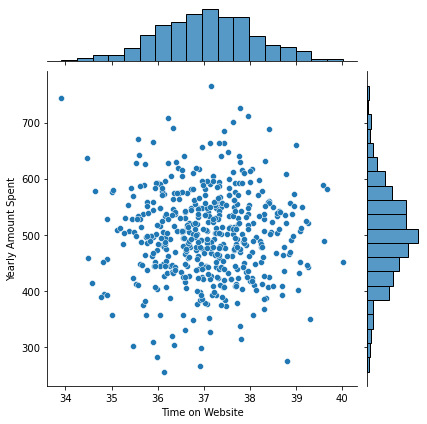

In [23]:
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent')

<AxesSubplot:>

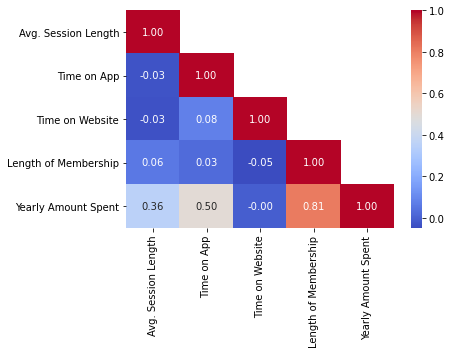

In [24]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=np.triu(np.ones([5,5]), k=1), fmt='.2f')

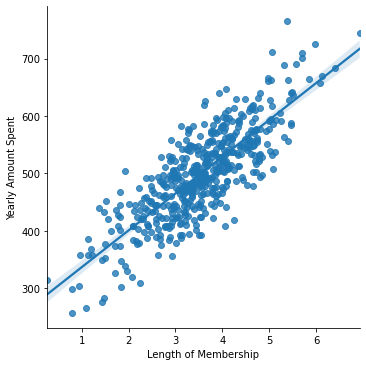

In [25]:
sns.lmplot(data=df, y='Yearly Amount Spent', x='Length of Membership')

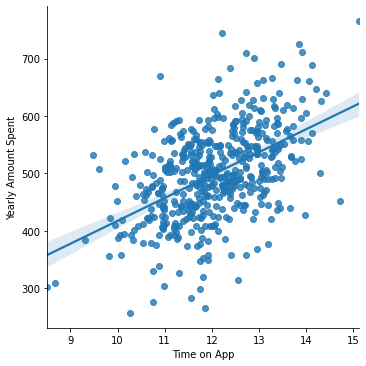

In [26]:
sns.lmplot(data=df, y='Yearly Amount Spent', x='Time on App')

In [27]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [28]:
Y = df['Yearly Amount Spent']
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(Y_train.shape, X_train.shape)

(300,) (300, 4)


In [30]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [31]:
print('Intercept = {:.2f}'.format(lm.intercept_))
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
display(coeff)

Intercept = -1045.12


,Coefficients
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [32]:
Y_pred = lm.predict(X_test)

Text(0, 0.5, 'Yearly Amount Spent - Predicted')

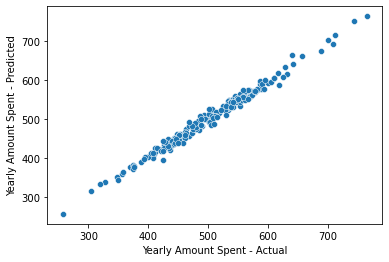

In [33]:
sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel('Yearly Amount Spent - Actual')
plt.ylabel('Yearly Amount Spent - Predicted')

In [34]:
print('MAE  = {:.2f}'.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('MSE  = {:.2f}'.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('RMSE = {:.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

MAE  = 7.74
MSE  = 93.83
RMSE = 9.69


In [35]:
print('Rsquare: {:.2f}'.format(metrics.explained_variance_score(Y_test, Y_pred)))

Rsquare: 0.99


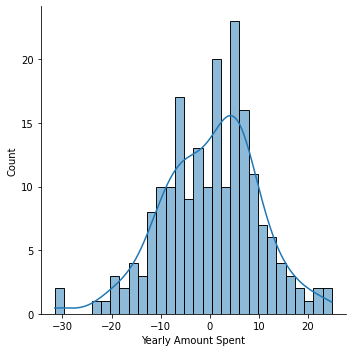

In [36]:
sns.displot(Y_pred-Y_test, kde=True, bins=30)

In [37]:
print('Intercept = {:.2f}'.format(lm.intercept_))
coeff = pd.DataFrame(data=lm.coef_.reshape(-1,1), index=X.columns, columns=['Coefficients'])
display(coeff)

Intercept = -1045.12


,Coefficients
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


### R like model fit summary

In [38]:
from statsmodels.formula.api import ols

df = pd.concat([X_train,Y_train], axis=1)
df.columns = ['Session', 'App', 'Web', 'Member', 'Amount']
df.head()

,Session,App,Web,Member,Amount
269,34.318927,13.402332,37.292045,3.606087,585.931844
181,34.142863,13.177775,38.856042,3.230974,557.529274
444,31.268104,12.132509,35.456798,3.072076,423.470533
287,33.908565,12.914847,39.068864,1.482360,432.472061
60,33.879784,12.495592,38.052610,4.639320,616.851523


In [39]:
model = ols("Amount~Session+App+Web+Member", data=df)

In [40]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     4332.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.47e-260
Time:                        00:01:51   Log-Likelihood:                -1120.4
No. Observations:                 300   AIC:                             2251.
Df Residuals:                     295   BIC:                             2269.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1045.1152     30.777    -33.957      0.000   -1105.686    -984.544
Session       25.6915      0.587     43.799      0.000      24.537      26.846
App           37.8926      0.633     59.869      0.000      36.647      39.138
Web            0.5606      0.627      0.895      0.372      -0.673       1.794
Member        61.6486      0.594    103.862      0.000      60.480      62.817
==============================================================================
Omnibus:                        0.970   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                1.005
Skew:                          -0.136   Prob(JB):                        0.605
Kurtosis:                       2.919   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## B. Logistic Regression

### B.1 - Titanic Dataset

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
path = '../../GitHub/Udemy-Python-for-DS/13-Logistic-Regression/'
train = pd.read_csv(path+'titanic_train.csv')
train.info()
# Passenger Class
# SibSp - Sibling/Spouse, Parch - Parent/Children

train = pd.read_csv('Kag_titanic_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.25,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.75,NaN,Q
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.55,NaN,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,NaN,S


In [44]:
train[train['Name'].str.contains('Andersson')].sort_values(by='Ticket')  #same ticket number for family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S


In [45]:
train.shape[0]

891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:>

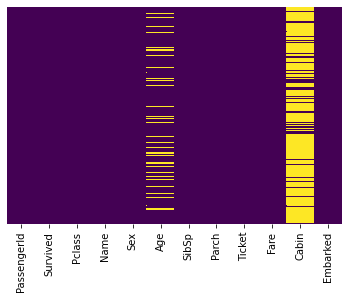

In [46]:
# Null values
display(train.isnull().mean())  #percent missing
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

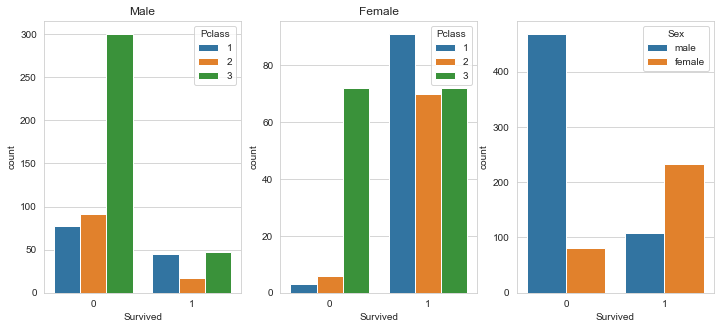

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title('Male')
sns.countplot(data=train.query('Sex=="male"')   , x='Survived', hue='Pclass')
plt.subplot(1,3,2)
plt.title('Female')
sns.countplot(data=train.query('Sex=="female"') , x='Survived', hue='Pclass')
plt.subplot(1,3,3)
sns.countplot(data=train, x='Survived', hue='Sex')

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

C:\Users\uditg\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


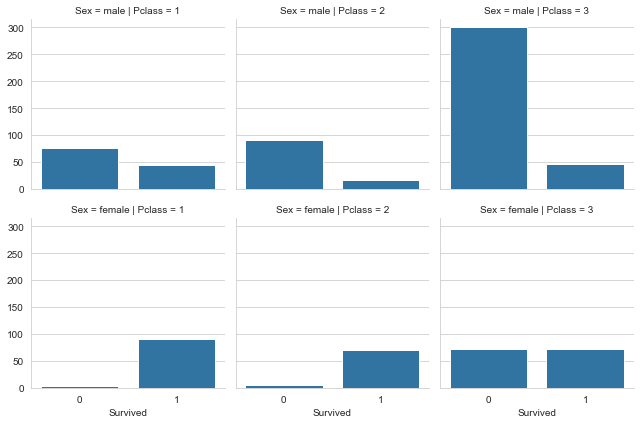

In [48]:
display(train.groupby(by=['Pclass','Sex'])['Survived'].value_counts().unstack())

g = sns.FacetGrid(data=train, col='Pclass', row='Sex')
g.map(sns.countplot, 'Survived')

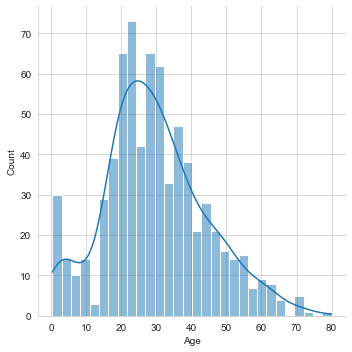

In [49]:
sns.displot(train['Age'].dropna(), kde=True, bins=30)
# sns.displot(train['Age'], kde=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

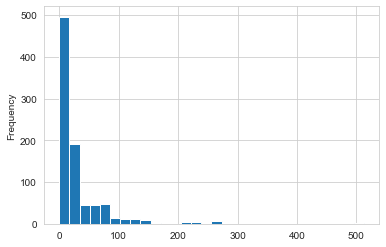

In [50]:
train['Fare'].plot.hist(bins=30)

In [51]:
#Making it interactive with Plotly
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

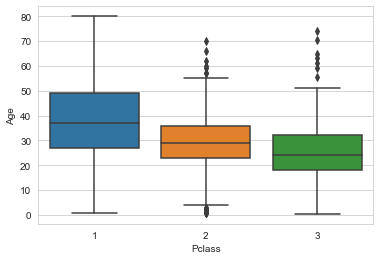

In [52]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [53]:
avgAge = train.groupby(by='Pclass').mean()['Age']
avgAge

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [54]:
#Imputing missing age
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return avgAge[Pclass]
    else:
        return Age

In [55]:
train['Agefill'] = train[['Age', 'Pclass']].apply(impute_age1, axis=1)
# axis: 0: apply function to each column. // 1: apply function to each row.

In [56]:
train[train['Age'].isna()].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agefill
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,38.233441
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S,25.140620
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S,25.140620
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,38.233441
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,25.140620


<AxesSubplot:xlabel='Age', ylabel='Agefill'>

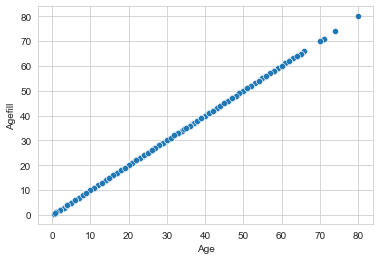

In [57]:
sns.scatterplot(data=train, x='Age', y='Agefill')

In [58]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Agefill        0.000000
dtype: float64

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Agefill      891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [60]:
train.drop(columns=['Cabin', 'Age'], inplace=True)
train.dropna(inplace=True)
print(train.isnull().mean())
print(train.info())

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Agefill        0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Agefill      889 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


In [61]:
# Family gets same ticket number. Which may be more robust than 'SibSp' - which has different value for Parents/ Children
# Cleaning Ticket numbers
import re

def extract_number(s):
    try:
        number = re.findall('\d{2,}', s)[0]
    except:
        number = '99999'
    return number

In [62]:
train['Ticket_clean'] = train['Ticket'].apply(extract_number)

In [63]:
train['Ticket_clean'].head()

0      21171
1      17599
2    3101282
3     113803
4     373450
Name: Ticket_clean, dtype: object

In [64]:
train[train['Ticket_clean']=='99999']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agefill,Ticket_clean
179,180,0,3,"Leonard, Mr. Lionel",male,0,0,LINE,0.0,S,36.0,99999
271,272,1,3,"Tornquist, Mr. William Henry",male,0,0,LINE,0.0,S,25.0,99999
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,0,0,LINE,0.0,S,19.0,99999
597,598,0,3,"Johnson, Mr. Alfred",male,0,0,LINE,0.0,S,49.0,99999
772,773,0,2,"Mack, Mrs. (Mary)",female,0,0,S.O./P.P. 3,10.5,S,57.0,99999
841,842,0,2,"Mudd, Mr. Thomas Charles",male,0,0,S.O./P.P. 3,10.5,S,16.0,99999


In [65]:
train[train['Ticket_clean'] != train['Ticket']].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agefill,Ticket_clean
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,0,0,PC 17477,69.30,C,24.0,17477
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,0,0,A/4. 39886,7.80,S,21.0,39886
671,672,0,1,"Davidson, Mr. Thornton",male,1,0,F.C. 12750,52.00,S,31.0,12750
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,0,2,C.A. 31921,26.25,S,8.0,31921
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,0,0,A/5 3540,8.05,S,18.0,3540


In [66]:
ticket_count = train.groupby(by='Ticket_clean')['Ticket'].count()
ticket_count

Ticket_clean
10482     1
110152    3
110413    3
110465    2
110564    1
         ..
8475      1
851       1
9234      1
9549      2
99999     6
Name: Ticket, Length: 677, dtype: int64

In [67]:
train = train.merge(ticket_count, how='left', on='Ticket_clean')

In [68]:
train.sort_values(by='Ticket_y', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket_x,Fare,Embarked,Agefill,Ticket_clean,Ticket_y
642,644,1,3,"Foo, Mr. Choong",male,0,0,1601,56.4958,S,25.14062,1601,7
836,839,1,3,"Chip, Mr. Chang",male,0,0,1601,56.4958,S,32.00000,1601,7
200,202,0,3,"Sage, Mr. Frederick",male,8,2,CA. 2343,69.5500,S,25.14062,2343,7
812,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,4,2,347082,31.2750,S,6.00000,347082,7
323,325,0,3,"Sage, Mr. George John Jr",male,8,2,CA. 2343,69.5500,S,25.14062,2343,7


In [69]:
train[train['Ticket_clean'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket_x,Fare,Embarked,Agefill,Ticket_clean,Ticket_y
13,14,0,3,"Andersson, Mr. Anders Johan",male,1,5,347082,31.275,S,39.0,347082,7
118,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,4,2,347082,31.275,S,2.0,347082,7
540,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,4,2,347082,31.275,S,9.0,347082,7
541,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,4,2,347082,31.275,S,11.0,347082,7
609,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,1,5,347082,31.275,S,39.0,347082,7
812,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,4,2,347082,31.275,S,6.0,347082,7
848,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,2,347082,31.275,S,4.0,347082,7


In [70]:
type(train['Ticket_y'][0]), type(train['SibSp'][0])

(numpy.int64, numpy.int64)

In [71]:
# Create Dummies
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [72]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
train = pd.concat([train, sex, embark], axis=1)
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket_x,Fare,Embarked,Agefill,Ticket_clean,Ticket_y,male,Q,S
98,100,0,2,"Kantor, Mr. Sinai",male,1,0,244367,26.0000,S,34.00000,244367,2,1,0,1
287,289,1,2,"Hosono, Mr. Masabumi",male,0,0,237798,13.0000,S,42.00000,237798,1,1,0,1
821,823,0,1,"Reuchlin, Jonkheer. John George",male,0,0,19972,0.0000,S,38.00000,19972,1,1,0,1
726,728,1,3,"Mannion, Miss. Margareth",female,0,0,36866,7.7375,Q,25.14062,36866,1,0,1,0
594,596,0,3,"Van Impe, Mr. Jean Baptiste",male,1,1,345773,24.1500,S,36.00000,345773,3,1,0,1


In [74]:
train.drop(['PassengerId', 'Name', 'Sex','Embarked', 'Ticket_x','Ticket_clean', 'SibSp'], axis=1, inplace=True)
train.sample(5)

,Survived,Pclass,Parch,Fare,Agefill,Ticket_y,male,Q,S
400,0,3,0,8.0500,26.0,1,1,0,1
538,1,1,2,49.5000,22.0,1,0,0,0
614,1,2,2,65.0000,24.0,2,0,0,1
141,1,3,0,15.8500,24.0,2,0,0,1
797,0,3,0,7.2292,30.0,1,1,0,0


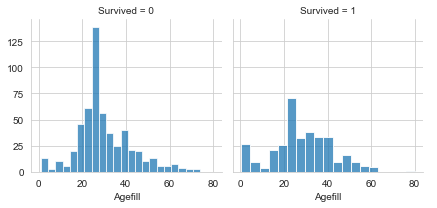

In [75]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.histplot, 'Agefill').add_legend()

In [76]:
train['Child_flag'] = train['Agefill'].apply(lambda x: 1 if x<=10 else 0)

In [77]:
train.head()

,Survived,Pclass,Parch,Fare,Agefill,Ticket_y,male,Q,S,Child_flag
0,0,3,0,7.2500,22.0,1,1,0,1,0
1,1,1,0,71.2833,38.0,1,0,0,0,0
2,1,3,0,7.9250,26.0,1,0,0,1,0
3,1,1,0,53.1000,35.0,2,0,0,1,0
4,0,3,0,8.0500,35.0,1,1,0,1,0


In [78]:
# Fitting Model
# Train/ Test split on Train data itself (because Test dataset does not have Y)
y = train['Survived']
x = train.drop(columns='Survived')

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(Y_train.shape, X_train.shape)

(622,) (622, 9)


In [79]:
logm = LogisticRegression(max_iter=1000)
logm.fit(X_train, Y_train)
Y_pred = logm.predict(X_test)

print(classification_report(Y_test, Y_pred))

print(confusion_matrix(y_true=Y_test,y_pred= Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

[[149  14]
 [ 33  71]]


In [80]:
print('{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(149/(149+33), 149/(149+14), 71/(71+14), 71/(71+33)))

0.82, 0.91, 0.84, 0.68


In [81]:
# Preparing Test data - same as train data

test = pd.read_csv(path+'titanic_test.csv')
test_pid = test['PassengerId']
print(test.info())
 
# Cleaning Test Data
test['Agefill'] = test[['Age', 'Pclass']].apply(impute_age1, axis=1)
test.drop(columns=['Cabin','Age'], inplace=True)

test.fillna(np.mean(test), inplace=True)            # Change from Train method - used for Fare

test['Ticket_clean'] = test['Ticket'].apply(extract_number)

ticket_count = test.groupby(by='Ticket_clean')['Ticket'].count()
ticket_count

test = test.merge(ticket_count, how='left', on='Ticket_clean')

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2  

In [82]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)
#display(sex.head(), embark.head())

test = pd.concat([test, sex, embark], axis=1)
test.drop(['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket_x','Ticket_clean', 'SibSp'], axis=1, inplace=True)

test['Child_flag'] = test['Agefill'].apply(lambda x: 1 if x<=10 else 0)

test.head()

,Pclass,Parch,Fare,Agefill,Ticket_y,male,Q,S,Child_flag
0,3,0,7.8292,34.5,1,1,1,0,0
1,3,0,7.0000,47.0,1,0,0,1,0
2,2,0,9.6875,62.0,1,1,1,0,0
3,3,0,8.6625,27.0,1,1,0,1,0
4,3,1,12.2875,22.0,1,0,0,1,0


In [83]:
Y_test_pred = logm.predict(test)
pd.DataFrame(Y_test_pred, columns=['Survived'], index = test_pid).to_csv('TTN_1_logistic.csv')

In [84]:
# Fitting model on all Training data:

logm = LogisticRegression(max_iter=1000)
logm.fit(x, y)
Y_pred = logm.predict(x)

print(classification_report(y, Y_pred))

print(confusion_matrix(y_true=y,y_pred= Y_pred, labels=[0,1]))

Y_test_pred = logm.predict(test)
pd.DataFrame(Y_test_pred, columns=['Survived'], index = test_pid).to_csv('TTN_2_logistic.csv')

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.71      0.75       340

    accuracy                           0.81       889
   macro avg       0.81      0.79      0.80       889
weighted avg       0.81      0.81      0.81       889

[[480  69]
 [ 97 243]]


### B.2 - Advertising Dataset

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [86]:
import os
path = '..\..\GitHub\\Udemy-Python-for-DS\\13-Logistic-Regression\\'

os.listdir(path)

['.ipynb_checkpoints',
 '01-Logistic Regression with Python.ipynb',
 '02-Logistic Regression Project.ipynb',
 '03-Logistic Regression Project - Solutions.ipynb',
 'advertising.csv',
 'titanic_test.csv',
 'titanic_train.csv']

In [87]:
ads = pd.read_csv(path+'advertising.csv')

In [88]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [89]:
# 'Daily Time Spent on Site': consumer time on site in minutes
# 'Age': cutomer age in years
# 'Area Income': Avg. Income of geographical area of consumer
# 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
# 'Ad Topic Line': Headline of the advertisement
# 'City': City of consumer
# 'Male': Whether or not consumer was male
# 'Country': Country of consumer
# 'Timestamp': Time at which consumer clicked on Ad or closed window
# 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [90]:
ads.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
437,76.24,27,63976.44,214.42,Monitored dynamic instruction set,Munozberg,0,Puerto Rico,2016-06-07 01:29:06,0
657,74.71,46,37908.29,258.06,Proactive local focus group,Port Eugeneport,1,Czech Republic,2016-06-13 11:06:40,0
432,69.58,43,28028.74,255.07,Cross-group value-added success,Port Katelynview,0,Congo,2016-04-04 18:36:59,1
510,57.86,30,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,2016-07-08 17:14:01,1
404,57.24,52,46473.14,117.35,Profound optimizing utilization,Richardsonland,1,Latvia,2016-06-29 21:39:42,1


In [91]:
ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [92]:
# Hypothesis: Maybe time of the day matters? - No, look at pairplot
ads['Timestamp'] = pd.to_datetime(ads['Timestamp'])
ads['Time of Day'] = ads['Timestamp'].apply(lambda ts: ts.hour)

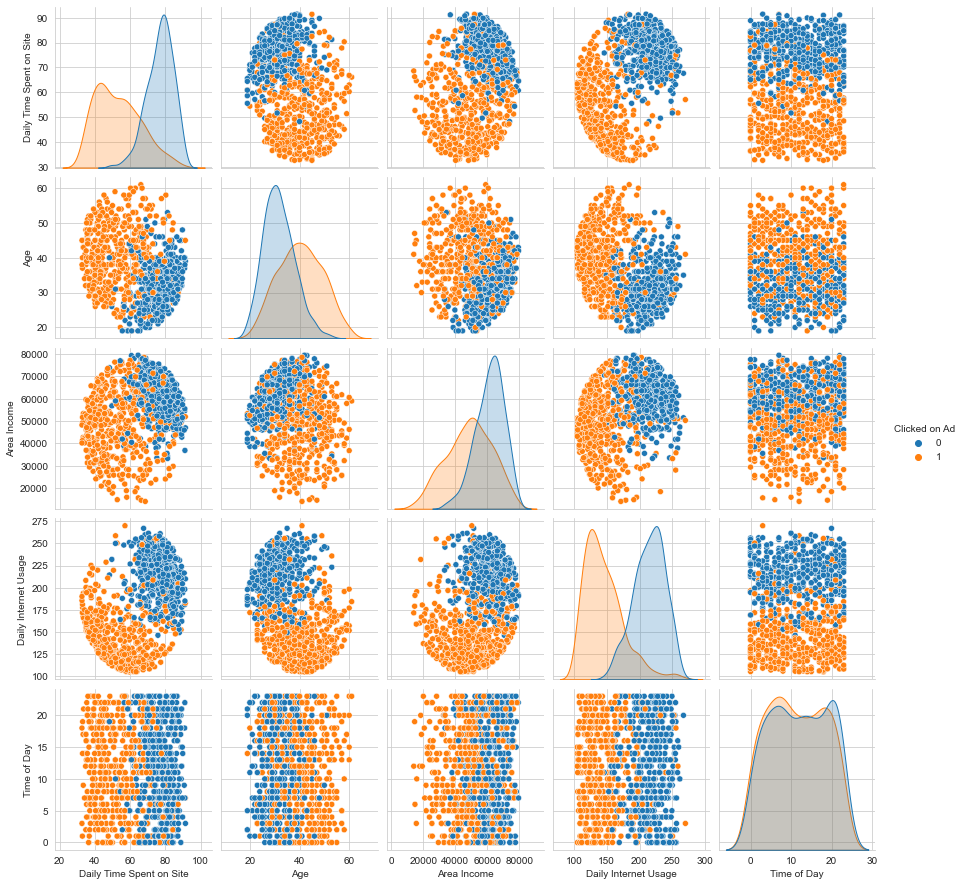

In [93]:
sns.pairplot(data = ads[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Clicked on Ad', 'Time of Day']], hue='Clicked on Ad')

<AxesSubplot:>

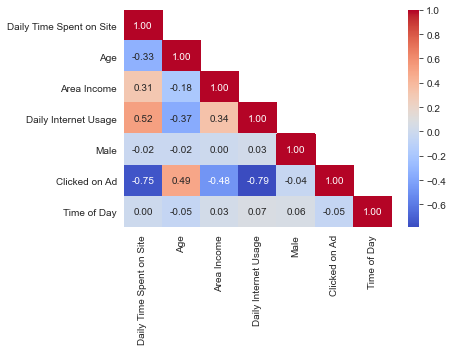

In [94]:
sns.heatmap(ads.corr(), cmap='coolwarm', annot=True, fmt='.2f', mask=np.triu(np.ones([7,7]), k=1))

array([[ 1.        , -0.33151334],
       [-0.33151334,  1.        ]])

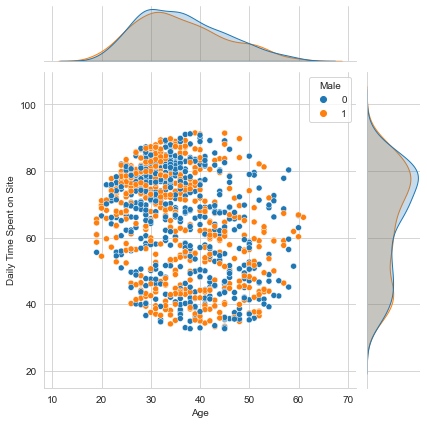

In [95]:
sns.jointplot(data=ads, x='Age', y='Daily Time Spent on Site', kind='scatter', hue='Male')
display(np.corrcoef(ads['Age'], ads['Daily Time Spent on Site']))

In [96]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Time of Day               1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 86.1+ KB


In [97]:
print(ads.columns)
X = ads[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
Y = ads['Clicked on Ad']

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Time of Day'],
      dtype='object')


In [98]:
# Fitting model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

logm = LogisticRegression(max_iter=1000)
logm.fit(X_train, Y_train)

Y_pred = logm.predict(X_test)

print(classification_report(Y_test, Y_pred))

print(confusion_matrix(Y_test, Y_pred))

(670, 5) (670,) (330, 5) (330,)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

[[170   1]
 [  5 154]]


In [99]:
Y_pred[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [100]:
Y_prob = logm.predict_proba(X_test)
display(Y_prob[0:5])

array([[8.07566969e-04, 9.99192433e-01],
       [9.96287771e-01, 3.71222906e-03],
       [9.92139788e-01, 7.86021176e-03],
       [1.84995298e-04, 9.99815005e-01],
       [9.83807886e-01, 1.61921143e-02]])

In [101]:
# Y_prob[:,1].tofile(, sep=',')  #array has 'tofile'
Y_test.to_csv('test_true.csv')

In [102]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob[:,1]) # keep probabilities for +ve outcome
fpr_50, tpr_50, _ = roc_curve(Y_test, np.zeros(len(Y_test))) # One way to get the straight line

In [103]:
display(len(fpr), fpr)
display(len(tpr), tpr)
display(len(thresholds), thresholds)

14

array([0.        , 0.        , 0.        , 0.00584795, 0.00584795,
       0.02923977, 0.02923977, 0.04678363, 0.04678363, 0.10526316,
       0.10526316, 0.12280702, 0.12280702, 1.        ])

14

array([0.        , 0.00628931, 0.91823899, 0.91823899, 0.96855346,
       0.96855346, 0.97484277, 0.97484277, 0.98742138, 0.98742138,
       0.99371069, 0.99371069, 1.        , 1.        ])

14

array([1.99998747, 0.99998747, 0.73887852, 0.7299616 , 0.51974452,
       0.43534505, 0.32912548, 0.30097178, 0.26604722, 0.13232719,
       0.12969411, 0.09438077, 0.09016318, 0.00234333])

<AxesSubplot:xlabel='False Positive Rate', ylabel='True Positive Rate'>

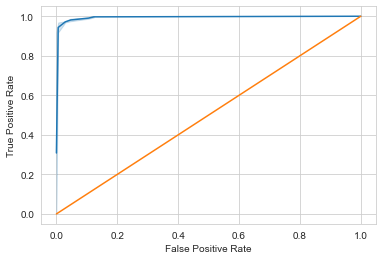

In [104]:
sns.lineplot(x=fpr, y=tpr, markers='#').set(xlabel='False Positive Rate', ylabel='True Positive Rate')
sns.lineplot(x=fpr_50, y=tpr_50)
#plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate')

In [105]:
auc = roc_auc_score(Y_test, Y_prob[:,1])
print('AUC: %.3f' % auc)

AUC: 0.997


In [106]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_prob[:,1])
# Precision - last element is 1. total elements = 1 more than thresholds
# Recall - last element is 0. total elements = 1 more than thresholds

In [107]:
display(precision[0:5], recall[0:5], thresholds[0:5])
display(precision[-5:], recall[-5:], thresholds[-5:])
display(len(precision), len(recall), len(thresholds))

array([0.88333333, 0.88268156, 0.88764045, 0.89265537, 0.89772727])

array([1.        , 0.99371069, 0.99371069, 0.99371069, 0.99371069])

array([0.09016318, 0.09438077, 0.09587925, 0.11358869, 0.12969411])

array([1., 1., 1., 1., 1.])

array([0.02515723, 0.01886792, 0.01257862, 0.00628931, 0.        ])

array([0.9999757 , 0.99997704, 0.99997834, 0.99998381, 0.99998747])

181

181

180

In [108]:
# ROC curves should be used when there are roughly equal numbers of observations for each class.
# Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [109]:
Y_test.value_counts()

0    171
1    159
Name: Clicked on Ad, dtype: int64

In [110]:
no_skill = 159/(159+171)  # lowest precision value, if probability threshold was 0
no_skill

0.4818181818181818

(Text(0.5, 0, 'Recall'), Text(0, 0.5, 'Precision'))

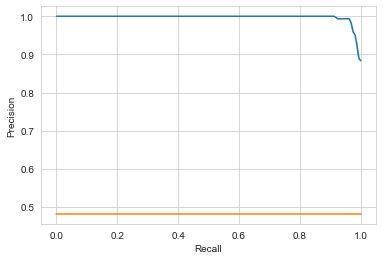

In [111]:
sns.lineplot(x=recall, y=precision, markers='#')
sns.lineplot(x=[0,1], y=[no_skill,no_skill])
plt.xlabel('Recall'), plt.ylabel('Precision')

In [112]:
f1_score(Y_test, Y_pred)

0.980891719745223

In [113]:
logm.coef_[0]

array([-1.50402484e-01,  1.35066760e-01, -9.71656343e-05, -5.82256457e-02,
        1.37805454e+00])

In [114]:
# Sign is relevant. But relevant size is not, since it depends on scale of those variables
print('Intercept = ',logm.intercept_)
coeff = pd.DataFrame(logm.coef_[0], X.columns, columns=['Coeff'])
coeff

Intercept =  [21.25387472]


,Coeff
Daily Time Spent on Site,-0.150402
Age,0.135067
Area Income,-0.000097
Daily Internet Usage,-0.058226
Male,1.378055


The End